<a href="https://colab.research.google.com/github/amitpuri/openagi-codes/blob/main/notebooks/Hopfield_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurodynex3

Noise level: 0.00, Retrieval accuracy: 1.00
Noise level: 0.10, Retrieval accuracy: 1.00
Noise level: 0.20, Retrieval accuracy: 1.00
Noise level: 0.30, Retrieval accuracy: 1.00
Noise level: 0.40, Retrieval accuracy: 1.00
Noise level: 0.50, Retrieval accuracy: 0.50


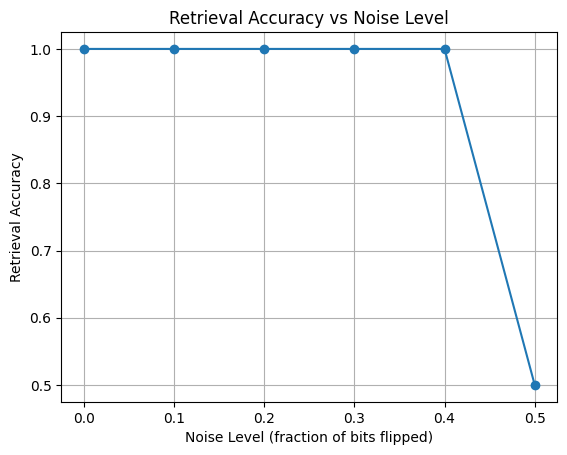

nr_steps: 1, Retrieval accuracy: 1.00
nr_steps: 5, Retrieval accuracy: 1.00
nr_steps: 10, Retrieval accuracy: 1.00
nr_steps: 15, Retrieval accuracy: 1.00
nr_steps: 20, Retrieval accuracy: 1.00
nr_steps: 25, Retrieval accuracy: 1.00


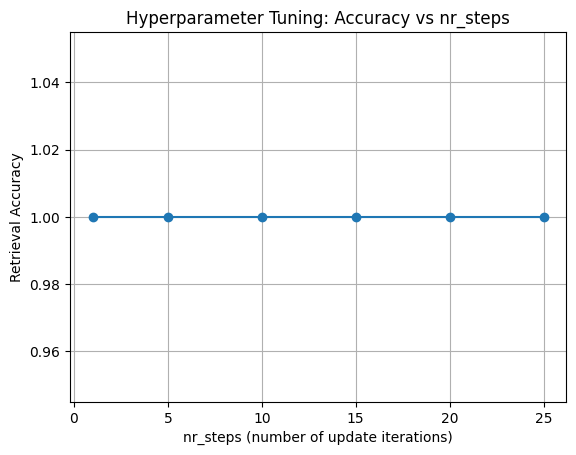

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network

# Define stored patterns (each with 4 neurons)
patterns = np.array([
    [1, -1, 1, -1],
    [-1, 1, -1, 1]
])

HopfieldNetwork = network.HopfieldNetwork

def compute_weight_matrix(patterns):
    """
    Compute the weight matrix using the Hebbian rule.
    For bipolar patterns, W = sum(outer(p, p)) with zero diagonal.
    """
    N = patterns.shape[1]
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W

def add_noise(pattern, noise_level):
    """Flip a fraction of bits in the pattern based on the noise level."""
    noisy_pattern = pattern.copy()
    n_flip = int(len(pattern) * noise_level)
    indices = np.random.choice(len(pattern), n_flip, replace=False)
    noisy_pattern[indices] *= -1
    return noisy_pattern

def retrieval_accuracy(original, retrieved):
    """Compute the fraction of bits that match between the original and retrieved patterns."""
    return np.mean(original == retrieved)

def synchronous_update_steps(model, nr_steps, weight_matrix):
    """
    Manually run synchronous updates for nr_steps using the given weight matrix.
    """
    for _ in range(nr_steps):
        net_input = weight_matrix.dot(model.state)
        # Synchronous update: sign(net_input), with tie-breaker: +1
        new_state = np.where(net_input >= 0, 1, -1)
        model.state = new_state

########################################
# Part 1: Evaluate retrieval accuracy vs. noise level
########################################
noise_levels = np.linspace(0, 0.5, 6)  # Noise levels: 0%, 10%, 20%, 30%, 40%, 50%
accuracies = []
nr_steps_eval = 5  # number of update steps for evaluation

# Compute weight matrix from patterns once (since patterns are fixed)
W = compute_weight_matrix(patterns)

for noise in noise_levels:
    # Reinitialize the network for each trial
    model = HopfieldNetwork(nr_neurons=len(patterns[0]))
    model.store_patterns(patterns)  # (this call may not set a weight matrix attribute)

    original = patterns[0]  # use the first stored pattern for testing
    noisy_input = add_noise(original, noise)
    # Set the network's initial state using the noisy pattern
    model.state = noisy_input.copy()

    # Perform synchronous updates manually using our computed weight matrix
    synchronous_update_steps(model, nr_steps_eval, W)

    # Retrieve final state from model.state
    retrieved = model.state
    acc = retrieval_accuracy(original, retrieved)
    accuracies.append(acc)
    print(f"Noise level: {noise:.2f}, Retrieval accuracy: {acc:.2f}")

plt.figure()
plt.plot(noise_levels, accuracies, marker='o', linestyle='-')
plt.xlabel("Noise Level (fraction of bits flipped)")
plt.ylabel("Retrieval Accuracy")
plt.title("Retrieval Accuracy vs Noise Level")
plt.grid(True)
plt.show()

########################################
# Part 2: Hyperparameter Tuning: Vary the number of update steps (nr_steps)
########################################
fixed_noise = 0.3  # fixed noise level of 30%
iter_values = [1, 5, 10, 15, 20, 25]
iter_accuracies = []

for iters in iter_values:
    # Reinitialize the network for each trial
    model = HopfieldNetwork(nr_neurons=len(patterns[0]))
    model.store_patterns(patterns)

    original = patterns[0]
    noisy_input = add_noise(original, fixed_noise)
    model.state = noisy_input.copy()

    # Run synchronous updates manually for a given number of steps
    synchronous_update_steps(model, iters, W)

    retrieved = model.state
    acc = retrieval_accuracy(original, retrieved)
    iter_accuracies.append(acc)
    print(f"nr_steps: {iters}, Retrieval accuracy: {acc:.2f}")

plt.figure()
plt.plot(iter_values, iter_accuracies, marker='o', linestyle='-')
plt.xlabel("nr_steps (number of update iterations)")
plt.ylabel("Retrieval Accuracy")
plt.title("Hyperparameter Tuning: Accuracy vs nr_steps")
plt.grid(True)
plt.show()
